# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:**

* Machine Learning task: Classification model
* Target variable: Loan_Status
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant
* **CoapplicantIncome:** Income of the co-applicant
* **LoanAmount:** Loan amount requested
* **Loan_Amount_Term:** Term of the loan
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [283]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [284]:
# check the number of rows and observations

num_rows, num_columns = df.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")


The dataset has 614 rows and 13 columns.


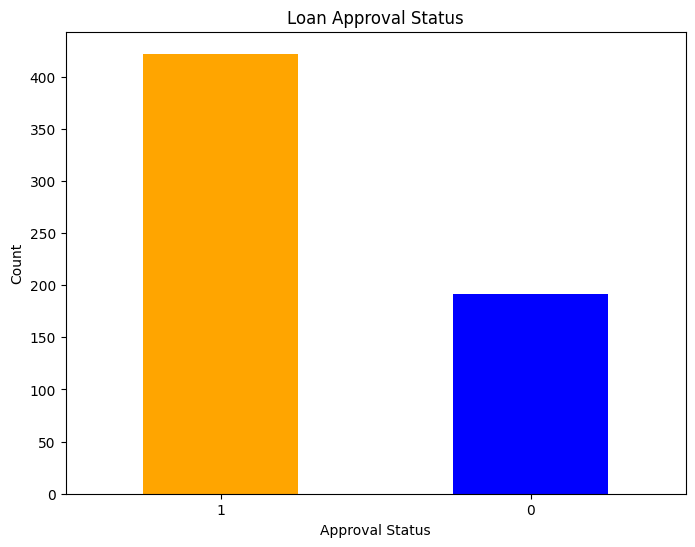

In [285]:
# How many application were approved and how many were denied? Plot a bar plot

# Count the number of approved and denied applications
number_approvals = df['Loan_Approved'].value_counts()

# Plotting a bar plot
plt.figure(figsize=(8, 6))
number_approvals.plot(kind='bar', color=['orange', 'blue'])

plt.title('Loan Approval Status')
plt.xlabel('Approval Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


### Data Prep

In [286]:
# drop 'Loan_ID' variable from the data. We won't need it.

df.drop('Loan_ID', axis=1, inplace=True)



In [287]:
# Create dummy variables for all 'object' type variables except 'Loan_Status'


object_columns = df.select_dtypes(include=['object']).columns.difference(['Loan_Approved'])

print(object_columns)

df = pd.get_dummies(df, columns=object_columns)

df.info()


Index(['Dependents', 'Education', 'Gender', 'Married', 'Property_Area',
       'Self_Employed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    int64  
 3   Loan_Amount_Term         614 non-null    int64  
 4   Credit_History           614 non-null    int64  
 5   Loan_Approved            614 non-null    int64  
 6   Dependents_0             614 non-null    uint8  
 7   Dependents_1             614 non-null    uint8  
 8   Dependents_2             614 non-null    uint8  
 9   Dependents_3+            614 non-null    uint8  
 10  Education_Graduate       614 non-null    uint8  
 11  Education_Not Graduate   614 non-null    uint8  
 12  Gender_Female  

In [288]:
# saving this procewssed dataset
df.to_csv('Processed_Credit_Dataset.csv', index=None)

### Data Partition

In [289]:
# Seperate the input features and target variable

X = df.drop('Loan_Approved', axis=1)  # Input features
y = df['Loan_Approved']  # Target variable




In [290]:
# splitting the data in training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [291]:
# check the split if interested

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (491, 20)
y_train shape: (491,)
X_test shape: (123, 20)
y_test shape: (123,)


# **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [292]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [293]:
# Fit the model on the data

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)




LogisticRegression(random_state=42)

In [294]:
# From sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict the loan eligibility on testing set and calculate its accuracy.

y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model on the testing set: {accuracy:.2f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy of the model on the testing set: 0.79
Confusion Matrix:
[[18 25]
 [ 1 79]]


In [295]:
# Print the confusion matrix

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[18 25]
 [ 1 79]]


In [296]:
# check how probabilities are assigned


In [297]:
# to change the default threshold and to make it 70% and above

#(pypred[:, 1] >= 0.7).astype(int)

## <font color='chocolate'>**2. Random Forest**

In [298]:
# Import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier



In [299]:
# Let's list the tunable hyperparameters for Random Forest algorithm

help(RandomForestClassifier)


Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 10

In [300]:
# Fit a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define hyperparameters to tune
n_estimators_list = [100, 200]
max_features_list = ['auto', 'sqrt', 0.33]
min_samples_leaf_list = [1, 3, 5, 10]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_accuracy = 0
best_parameters = {}

# Iterate over hyperparameters
for n_estimators in n_estimators_list:
    for max_features in max_features_list:
        for min_samples_leaf in min_samples_leaf_list:
            # Initializing the Random Forest Classifier
            rf_classifier = RandomForestClassifier(n_estimators=n_estimators,
                                                   max_features=max_features,
                                                   min_samples_leaf=min_samples_leaf,
                                                   random_state=42)

            # Fitting the classifier on the training data
            rf_classifier.fit(X_train, y_train)

            # Making predictions on the testing data
            y_pred = rf_classifier.predict(X_test)

            # Calculating accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Check if this model's accuracy is better than previous ones
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {
                    'n_estimators': n_estimators,
                    'max_features': max_features,
                    'min_samples_leaf': min_samples_leaf
                }

# Display the best parameters and their corresponding accuracy
print("Best Parameters:", best_parameters)
print("Best Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'max_features': 'auto', 'min_samples_leaf': 3}
Best Accuracy: 0.7886178861788617
